#### 
I am not presenting all my results because part of what i do is also in the strategies i develop

I would really appreciate to have a call to be able to discuss all the results that i have inb this notebook and to explain how i did the research. 

Then i will be able to explain what i can do if i were to have more time to work on this project 

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from create_gif_liquidity import *

df = pd.read_csv('ekubo_market_depth_dataset.csv')

df['time'] = pd.to_datetime(df['BLOCK_TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')
df.sort_values('time', inplace=True)
df.set_index('time', inplace=True)

def calculate_price(tick, token0_decimals, token1_decimals):
    return np.where(tick == 0, 0, (1.000001 ** tick) * (token0_decimals - token1_decimals))

df['PRICE']       = calculate_price(df['SWAP_TICK'].values, df['TOKEN0_DECIMALS'].values, df['TOKEN1_DECIMALS'].values) *10**11
df['UPPER_PRICE'] = calculate_price(df['UPPER_TICK'].values, df['TOKEN0_DECIMALS'].values, df['TOKEN1_DECIMALS'].values) *10**11
df['LOWER_PRICE'] = calculate_price(df['LOWER_TICK'].values, df['TOKEN0_DECIMALS'].values, df['TOKEN1_DECIMALS'].values) *10**11

df['RESERVE_TOKEN0_REAL'] = df['TOKEN0_REAL_AMOUNT'].astype('float').cumsum()
df['RESERVE_TOKEN1_REAL'] = df['TOKEN1_REAL_AMOUNT'].astype('float').cumsum()

# Filter rows where EVENT_NAME is 'Swap' and calculate FEE_TOKEN0_REAL and FEE_TOKEN1_REAL
df.loc[df['EVENT_NAME'] == 'Swap', 'FEE_TOKEN0_REAL'] = df[df['EVENT_NAME'] == 'Swap']['TOKEN0_REAL_AMOUNT'].astype('float') * df[df['EVENT_NAME'] == 'Swap']['FEE_TIER']
df.loc[df['EVENT_NAME'] == 'Swap', 'FEE_TOKEN1_REAL'] = df[df['EVENT_NAME'] == 'Swap']['TOKEN1_REAL_AMOUNT'].astype('float') * df[df['EVENT_NAME'] == 'Swap']['FEE_TIER']

# Fill NaN values with 0
df['FEE_TOKEN0_REAL'].fillna(0, inplace=True)
df['FEE_TOKEN1_REAL'].fillna(0, inplace=True)

# calculate fee value in USD
df['FEE_USD'] = df['FEE_TOKEN1_REAL'].abs() # df['FEE_TOKEN0_REAL'] + df['FEE_TOKEN1_REAL'] * df['PRICE']
                                                  
df['RATIO'] = df['RESERVE_TOKEN0_REAL'] / df['RESERVE_TOKEN1_REAL']

print(df['TO_ADDRESS'].unique()) # is the core contract address of ekubo contract on starknet 

df

C:\Users\amvmo\AppData\Local\Temp\ipykernel_5256\3779450739.py:6: DtypeWarning:

Columns (8,10,13,17) have mixed types. Specify dtype option on import or set low_memory=False.



['0x00000005dd3d2f4429af886cd1a3b08289dbcea99a294197e9eb43b0e0325b4b']


,BLOCK_NUMBER,BLOCK_TIMESTAMP,TX_HASH,TX_ID,POOL_ID,TOKEN0_ADDRESS,TOKEN1_ADDRESS,EVENT_NAME,FROM_ADDRESS,TO_ADDRESS,...,TICK_SPACING,PRICE,UPPER_PRICE,LOWER_PRICE,RESERVE_TOKEN0_REAL,RESERVE_TOKEN1_REAL,FEE_TOKEN0_REAL,FEE_TOKEN1_REAL,FEE_USD,RATIO
time,,,,,,,,,,,,,,,,,,,,,
2023-08-21 18:06:57,165392,2023-08-21 18:06:57,0x01ea581a453476494eca6b2ea00a1f76db90782dea8a...,5461067_0_165392_85,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Mint,0x03f60afe30844f556ac1c674678ac4447840b1c6c268...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,19802,0.000000,2285.007793,1801.726828,-7.742768e-02,-1.000000e+02,0.000000e+00,0.000000,0.000000,0.000774
2023-08-24 15:58:31,170064,2023-08-24 15:58:31,0x069bc31e0f800cc1f8a230d7e9aefdb3dd951b25ffc0...,5461067_0_170064_159,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Burn,0x03f60afe30844f556ac1c674678ac4447840b1c6c268...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,19802,0.000000,2285.007793,1801.726828,-6.592967e-02,-8.515000e+01,0.000000e+00,0.000000,0.000000,0.000774
2023-08-25 17:26:00,171593,2023-08-25 17:26:00,0x07a988769782b294fee1fb284dc6cf91a489d4fadf0e...,5461067_0_171593_125,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,0x068f5c6a61780768455de69077e07e89787839bf8166...,Mint,0x05bd8ab4d952836ca627116bad96ab584480c15e94f9...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,200,0.000000,0.000000,0.000000,-9.400659e+02,-1.025150e+03,0.000000e+00,0.000000,0.000000,0.917003
2023-08-25 17:50:20,171601,2023-08-25 17:50:20,0x053ef4a64141cae34f1aafb6e2122bf6f84d375e26d1...,5461067_0_171601_34,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Mint,0x01abcf557276cd3e3e717c2d385685c49397f7da5e8b...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,5982,0.000000,1916.586086,1680.248314,-9.400659e+02,-1.125150e+03,0.000000e+00,0.000000,0.000000,0.835503
2023-08-25 18:08:47,171607,2023-08-25 18:08:47,0x05e56c0fa062d8e1f981b2e0ceb4eb574317ce03fe87...,5461067_0_171607_182,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,0x068f5c6a61780768455de69077e07e89787839bf8166...,Mint,0x06826f64179d7410b76516bdcf66fc6bd9c6b1c3c932...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,5982,0.000000,0.000000,0.000000,-1.040066e+03,-1.228005e+03,0.000000e+00,0.000000,0.000000,0.846955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25 03:57:26,582428,2024-02-25 03:57:26,0x01debcfcf3339ec5c5163e7f320bd0fc70617c61de80...,5461067_0_582428_32,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,0x068f5c6a61780768455de69077e07e89787839bf8166...,Burn,0x0261e13db5c0be8696ef192e9b0ea3ab81bdf09ef0e3...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,25,0.000000,0.000000,0.000000,-2.893524e+06,-4.602205e+07,0.000000e+00,0.000000,0.000000,0.062873
2024-02-25 03:57:26,582428,2024-02-25 03:57:26,0x0286d056b451658c07b718e30fc119da671f2d0df242...,5461067_0_582428_60,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x04718f5a0fc34cc1af16a1cdee98ffb20c31f5cd61d6...,0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee...,Swap,0x03266fe47923e1500aec0fa973df8093b5850bbce8dc...,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,...,200,2.285910,0.000000,0.000000,-2.893531e+06,-4.602204e+07,-7.000000e-04,0.001333,0.001333,0.062873
2024-02-25 03:57:26,582428,2024-02-25 03:57:26,0x03ba9456697309a756c547c8fc436984c820466cb109...,5461067_0_582428_33,0x00000005dd3d2f4429af886cd1a3b08289dbcea99a29...,0x04718f5a0fc34cc1af16a1cdee98ffb20c31f5cd61d6...,0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c...,Mint,0x01db41cd37

<AxesSubplot:xlabel='time'>

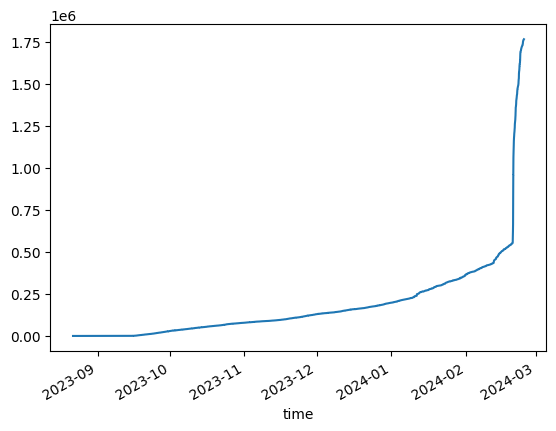

In [61]:
# Fee growth in USD for the supply side revenues in the pool
(df['FEE_USD'].abs()).cumsum().plot()

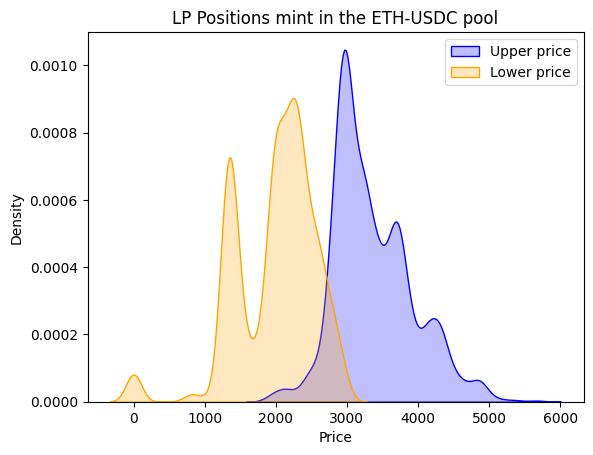

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting data within desired ranges
upper_price = pool_dt.UPPER_PRICE[(pool_dt.UPPER_PRICE < 6000) & (pool_dt.UPPER_PRICE > 1000)]
lower_price = pool_dt.LOWER_PRICE[(pool_dt.LOWER_PRICE < 3000) & (pool_dt.LOWER_PRICE > 0)]

# Resetting index to avoid duplicate labels
upper_price = upper_price.reset_index(drop=True)
lower_price = lower_price.reset_index(drop=True)

# Plotting KDE for upper and lower prices
sns.kdeplot(upper_price, color='blue', label='Upper price', fill=True)
sns.kdeplot(lower_price, color='orange', label='Lower price', fill=True)

# Plotting the price over time
#sns.lineplot(data=pool_dt.PRICE[pool_dt.PRICE > 10], color='black', label='Price')

plt.title('LP Positions mint in the ETH-USDC pool')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.savefig('pics/mint_density.png')
plt.show()


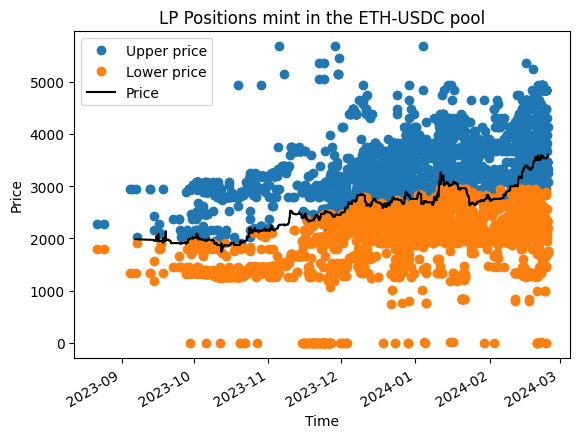

In [90]:
pool_dt = pool_data[['PRICE', 'UPPER_PRICE', 'LOWER_PRICE']]

upper_price = pool_dt.UPPER_PRICE[(pool_dt.UPPER_PRICE < 6_000) & (pool_dt.UPPER_PRICE > 1_000)]
lower_price = pool_dt.LOWER_PRICE[(pool_dt.LOWER_PRICE < 3_000) & (pool_dt.UPPER_PRICE > 0)]

plt.plot(upper_price.index, upper_price, 'o')
plt.plot(lower_price.index, lower_price, 'o')
pool_dt.PRICE[pool_dt.PRICE > 10].plot(color='black')

plt.title('LP Positions mint in the ETH-USDC pool')
plt.legend(['Upper price', 'Lower price', 'Price'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.savefig('pics/mint_positions_history.png')
plt.show()


In [70]:
pool_id = df['POOL_ID'].values[0]
# first is addres of the mainnet core contract
# second is the address of the token 0
# third  is the address of the token 1
token0_address = pool_id.split('-')[1]
token1_address = pool_id.split('-')[2]
core_contract_address = pool_id.split('-')[0]
print('Token 0 address:', token0_address)
print('Token 1 address:', token1_address)

# select only one pool 
pool_data = df[df['POOL_ID'] == pool_id].copy()

# LIQUIDITY_AMOUNT is the amount added or removed after a mint or a burn event
# LIQUIDITY is the total liquidity in the pool
pool_data['LIQUIDITY'] = pool_data['LIQUIDITY_AMOUNT'].astype('float').cumsum()

# select only one trader 
trader_id =  '0x078ba266d0326ba2f4ecfb7d14a0af9ecd436809a04fae8e5774e0b49774da77' # pool_data['FROM_ADDRESS'].values[6]
trader_tx_pool = pool_data[pool_data['FROM_ADDRESS'] == trader_id].copy()

# pool_data = pool_data[pool_data['EVENT_NAME'] == 'Swap']

f2 = ['EVENT_NAME', 'TOKEN0_REAL_AMOUNT', 'TOKEN1_REAL_AMOUNT', 'FEE_TIER', 'LIQUIDITY', 'PRICE', 'UPPER_PRICE', 'LOWER_PRICE', 'LOWER_TICK', 'UPPER_TICK', 'SWAP_TICK']
trader_tx_pool[f2]

Token 0 address: 0x049d36570d4e46f48e99674bd3fcc84644ddd6b96f7c741b1562b82f9e004dc7
Token 1 address: 0x053c91253bc9682c04929ca02ed00b3e423f6710d2ee7e0d5ebb06f3ecf368a8


,EVENT_NAME,TOKEN0_REAL_AMOUNT,TOKEN1_REAL_AMOUNT,FEE_TIER,LIQUIDITY,PRICE,UPPER_PRICE,LOWER_PRICE,LOWER_TICK,UPPER_TICK,SWAP_TICK
time,,,,,,,,,,,
2023-12-31 12:20:38,Mint,-0.022932,-150.316781,0.01,1.072712e+16,0.0,2785.394001,2677.237169,-19920812,-19881208,0
2024-01-02 08:39:49,Burn,0.000000,201.240324,0.01,1.127387e+16,0.0,2785.394001,2677.237169,-19920812,-19881208,0
2024-01-02 08:44:34,Mint,-0.035512,-200.000000,0.01,1.208934e+16,0.0,2897.920226,2841.100071,-19861406,-19841604,0
2024-01-03 14:29:39,Burn,0.118207,0.000000,0.01,1.214829e+16,0.0,2897.920226,2841.100071,-19861406,-19841604,0
2024-01-03 14:46:51,Mint,-0.034422,-191.332274,0.01,1.323832e+16,0.0,2677.237169,2624.743995,-19940614,-19920812,0
2024-01-04 15:57:32,Burn,0.000000,265.234448,0.01,1.282675e+16,0.0,2677.237169,2624.743995,-19940614,-19920812,0
2024-01-04 16:04:42,Mint,-0.040645,-150.007997,0.01,1.350926e+16,0.0,2730.780173,2677.237169,-19920812,-19901010,0
2024-01-08 01:01:58,Burn,0.106396,0.000000,0.01,1.444891e+16,0.0,2730.780173,2677.237169,-19920812,-19901010,0
2024-01-08 02:51:41,Mint,-0.035233,-160.416567,0.01,1.581660e+16,0.0,2677.237169,2624.743995,-19940614,-19920812,0


In [72]:
import pandas as pd

def market_depth(pool_data, depth):
    """
    Calculate market depth based on token amounts within a specified depth range

    Params:
    - pool_data: DataFrame containing the pool data.
    - depth: The depth percentage (e.g., 0.01 for 1%).

    Returns:
    - The total USD value of tokens within the depth range.
    """
    tick_spacing = pool_data['TICK_SPACING'].iloc[0]  # Assume a uniform tick spacing for simplicity
    current_price = pool_data['PRICE'].iloc[-1]
    lower_bound_price = current_price / (1 + depth)
    upper_bound_price = current_price * (1 + depth)
    print('lower_bound_price:', lower_bound_price)
    print('upper_bound_price:', upper_bound_price)
    
    # Initialize the total USD value
    total_usd_value = 0

    for _, row in pool_data.iterrows():
        lower_tick = row['LOWER_TICK']
        upper_tick = row['UPPER_TICK']

        # Check if the position's range overlaps with the depth range
        if not (lower_bound_price > upper_tick or upper_bound_price < lower_tick):
            # Calculate the number of ticks covered by this position
            num_ticks = (upper_tick - lower_tick) // tick_spacing + 1

            # Distribute token amounts equally across all ticks
            token0_per_tick = float(row['TOKEN0_REAL_AMOUNT']) / num_ticks
            token1_per_tick = float(row['TOKEN1_REAL_AMOUNT']) / num_ticks

            # the USD value of token0 is direct and token1 needs to be multiplied by the current price
            # Adjust based on your token valuation model
            if row['EVENT_NAME'] != 'Burn':
                total_usd_value -= (token0_per_tick + token1_per_tick * current_price) * num_ticks
            if row['EVENT_NAME'] != 'Mint':
                total_usd_value += (token0_per_tick + token1_per_tick * current_price) * num_ticks

    return total_usd_value


In [88]:
depth_value_10 = market_depth(df, 0.1)
depth_value_5 = market_depth(df, 0.05)
depth_value_2 = market_depth(df, 0.02)
print(f"Market for a depth of 2  % : {round(depth_value_2)}")
print(f"Market for a depth of 5  % : {round(depth_value_5)}")
print(f"Market for a depth of 10 % : {round(depth_value_10)}")

lower_bound_price: 3298.7447717506366
upper_bound_price: 3991.4811738182707
lower_bound_price: 3455.8278561197144
upper_bound_price: 3810.050211371986
lower_bound_price: 3557.469851887942
upper_bound_price: 3701.1916339042145
Market for a depth of 2  % : 19685184449
Market for a depth of 5  % : 19685184449
Market for a depth of 10 % : 19927209809


In [77]:
pool_data[f2 + ['LOWER_TICK', 'UPPER_TICK', 'SWAP_TICK']].round() # .to_csv('pool_data.csv')

,EVENT_NAME,TOKEN0_REAL_AMOUNT,TOKEN1_REAL_AMOUNT,FEE_TIER,LIQUIDITY,PRICE,UPPER_PRICE,LOWER_PRICE,LOWER_TICK,UPPER_TICK,SWAP_TICK,LOWER_TICK,UPPER_TICK,SWAP_TICK
time,,,,,,,,,,,,,,
2023-08-21 18:06:57,Mint,-0.0,-100.0,0.0,4.865838e+13,0.0,2285.0,1802.0,-20316852,-20079228,0,-20316852,-20079228,0
2023-08-24 15:58:31,Burn,0.0,15.0,0.0,4.135963e+13,0.0,2285.0,1802.0,-20316852,-20079228,0,-20316852,-20079228,0
2023-09-04 11:15:51,Mint,-0.0,-102.0,0.0,5.512441e+13,0.0,2956.0,1339.0,-20613882,-19821802,0,-20613882,-19821802,0
2023-09-05 05:17:40,Mint,-0.0,-3.0,0.0,5.558129e+13,0.0,2956.0,1339.0,-20613882,-19821802,0,-20613882,-19821802,0
2023-09-06 20:01:25,Swap,-0.0,5.0,0.0,5.558129e+13,1988.0,0.0,0.0,0,0,-20218287,0,0,-20218287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25 02:29:19,Swap,0.0,-1099.0,0.0,1.422991e+16,3607.0,0.0,0.0,0,0,-19622828,0,0,-19622828
2024-02-25 02:29:19,Swap,0.0,-1099.0,0.0,1.422991e+16,3607.0,0.0,0.0,0,0,-19622828,0,0,-19622828
2024-02-25 03:07:33,Burn,0.0,278.0,0.0,1.420655e+16,0.0,4139.0,2196.0,-20118832,-19485168,0,-20118832,-19485168,0


In [86]:
def get_traders_with_enough_events(pool_data, min_events=12):
    traders_with_enough_events = []
    for trader_id in set(pool_data['FROM_ADDRESS'].values):
        num_events = len(pool_data[(pool_data['FROM_ADDRESS'] == trader_id) & (pool_data['EVENT_NAME'].isin(['Mint', 'Burn']))])
        if num_events >= min_events:
            traders_with_enough_events.append(trader_id)
    return traders_with_enough_events

def plot_price_ranges(pool_data, trader_id, ax1, ax2):
    trader_data = pool_data[pool_data['FROM_ADDRESS'] == trader_id]
    pool_data[pool_data['EVENT_NAME'] == 'Swap'].PRICE.rolling(20).mean().plot(ax=ax1)
    upper_price = trader_data[trader_data['EVENT_NAME'] == 'Mint'].UPPER_PRICE
    lower_price = trader_data[trader_data['EVENT_NAME'] == 'Mint'].LOWER_PRICE
    ax1.step(upper_price.index, upper_price, where='post')
    ax1.step(lower_price.index, lower_price, where='post')

    min_time = min(upper_price.index.min(), lower_price.index.min())
    max_time = max(upper_price.index.max(), lower_price.index.max())
    limited_data = pool_data[(pool_data.index >= min_time) & (pool_data.index <= max_time) & (pool_data['EVENT_NAME'] == 'Swap')]
    limited_data.PRICE.rolling(20).mean().plot(ax=ax2)
    ax2.step(upper_price.index, upper_price, where='post')
    ax2.step(lower_price.index, lower_price, where='post')

def calculate_trader_metrics(pool_data, trader_id):
    trader_liquidity = 0
    trader_liquidity_percentages = []
    pnl_values = []

    for index, row in pool_data.iterrows():
        if row['FROM_ADDRESS'] == trader_id:
            if row['EVENT_NAME'] == 'Mint':
                trader_liquidity += float(row['LIQUIDITY_AMOUNT'])
            elif row['EVENT_NAME'] == 'Burn':
                trader_liquidity -= float(row['LIQUIDITY_AMOUNT'])
        
        total_liquidity = row['LIQUIDITY']

        if total_liquidity != 0:
            trader_liquidity_percent = trader_liquidity / total_liquidity * 100
        else:
            trader_liquidity_percent = 0

        pnl = row['FEE_USD'] * trader_liquidity_percent/ 100
        pnl_values.append(pnl)
        trader_liquidity_percentages.append(trader_liquidity_percent)

    return trader_liquidity_percentages, pnl_values

def plot_cumulative_pnl_and_liquidity(pool_data, trader_id, ax3, ax4):
    trader_liquidity_percentages, pnl_values = calculate_trader_metrics(pool_data, trader_id)
    pool_data['Trader_Liquidity_Percentage'] = trader_liquidity_percentages
    pool_data['PNL'] = pnl_values
    pool_data['Cumulative_PNL'] = pool_data['PNL'].cumsum()

    pool_data['Cumulative_PNL'].plot(ax=ax3, color='black')
    ax3.set_title('Cumulative PNL')
    ax3.set_xlabel('Timestamp')

    pool_data['Trader_Liquidity_Percentage'].plot(ax=ax4, color='red')
    ax4.set_title('Trader Liquidity Percentage')
    ax4.set_xlabel('Timestamp')



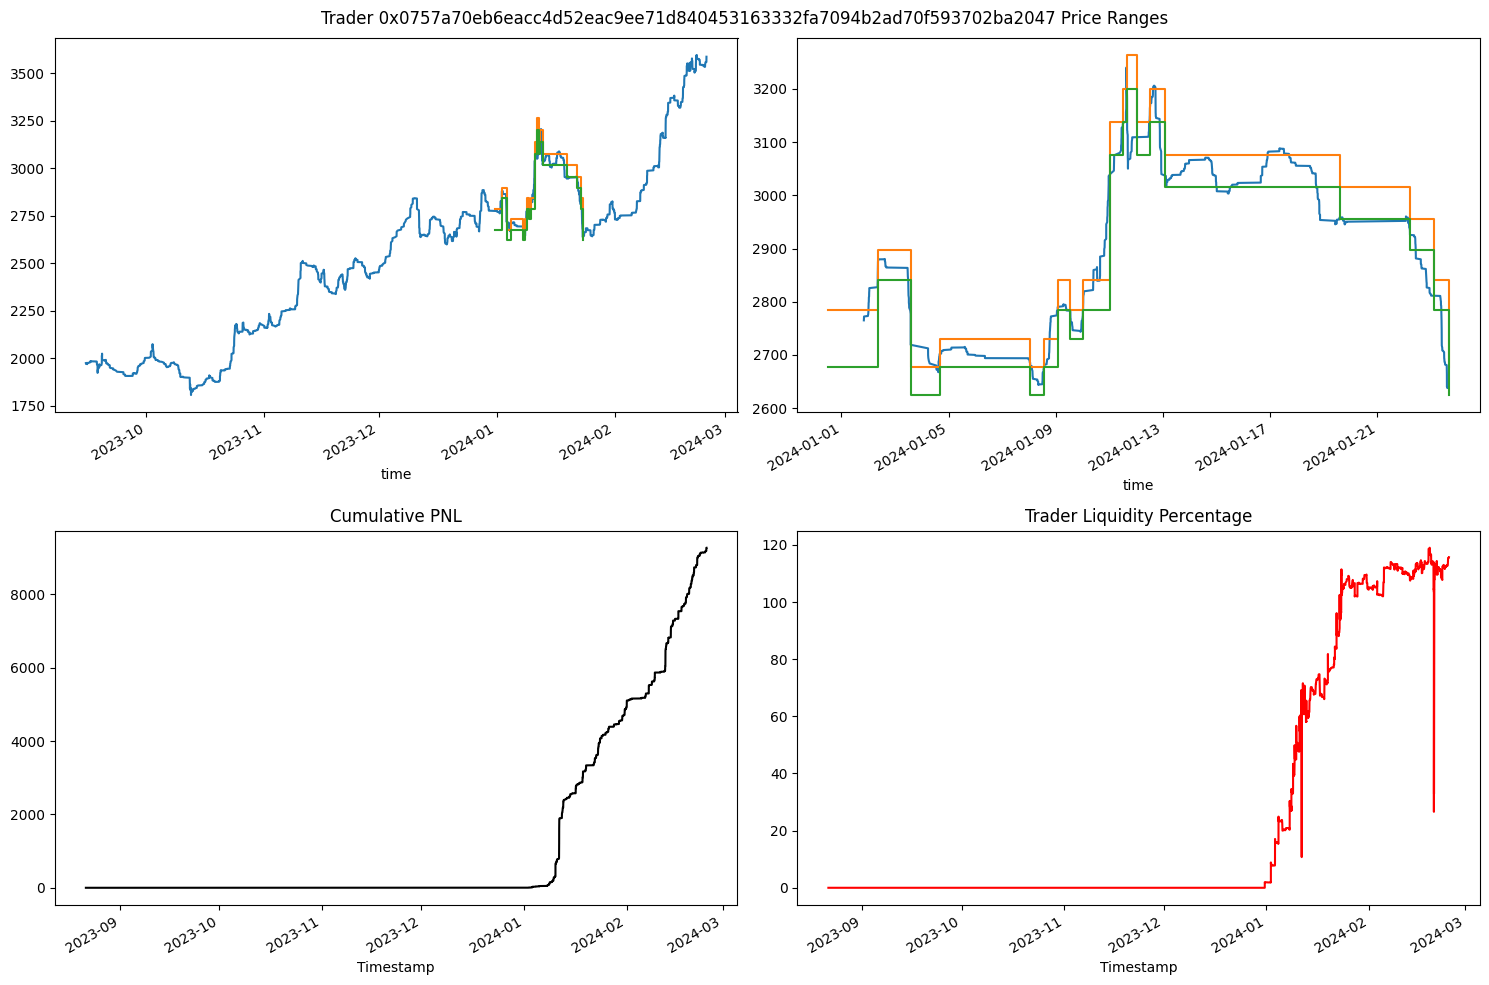

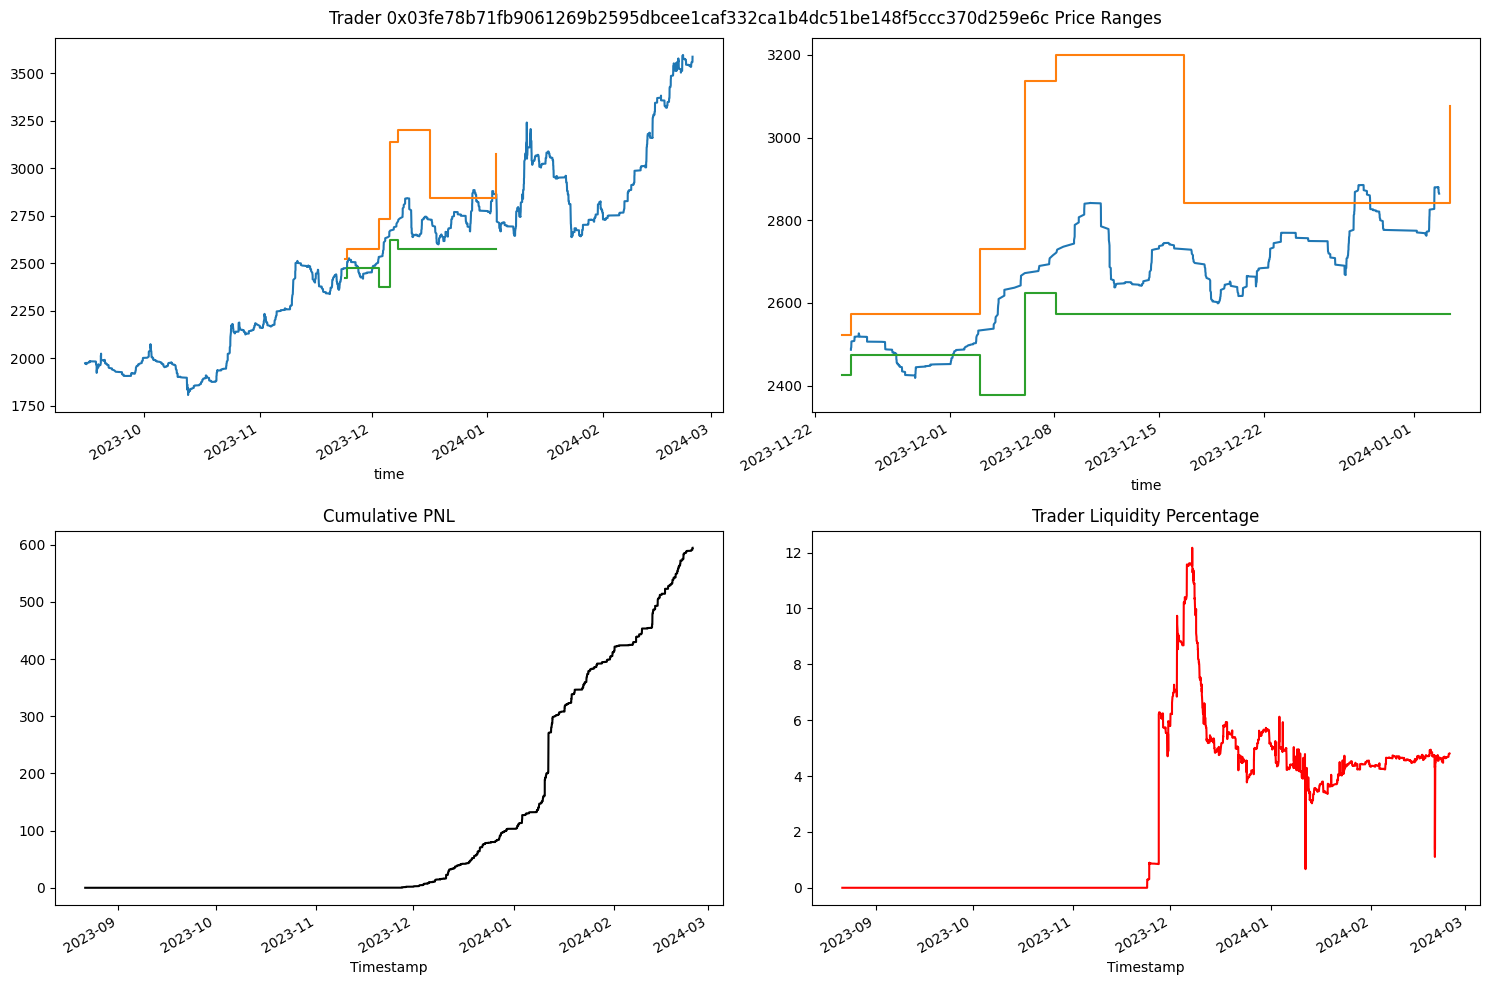

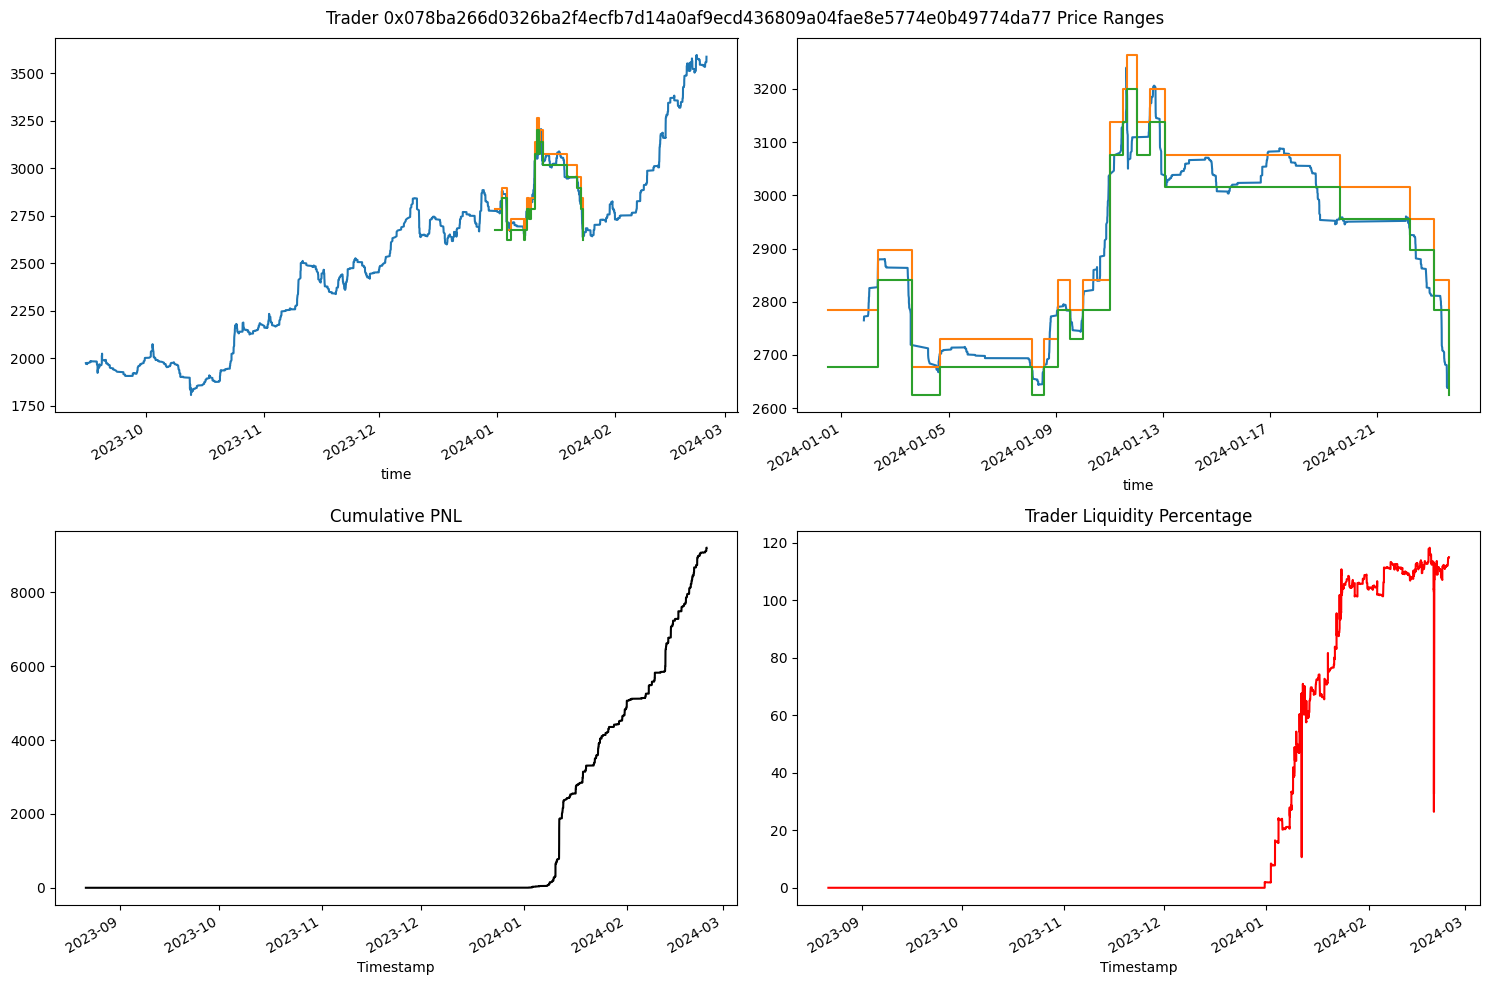

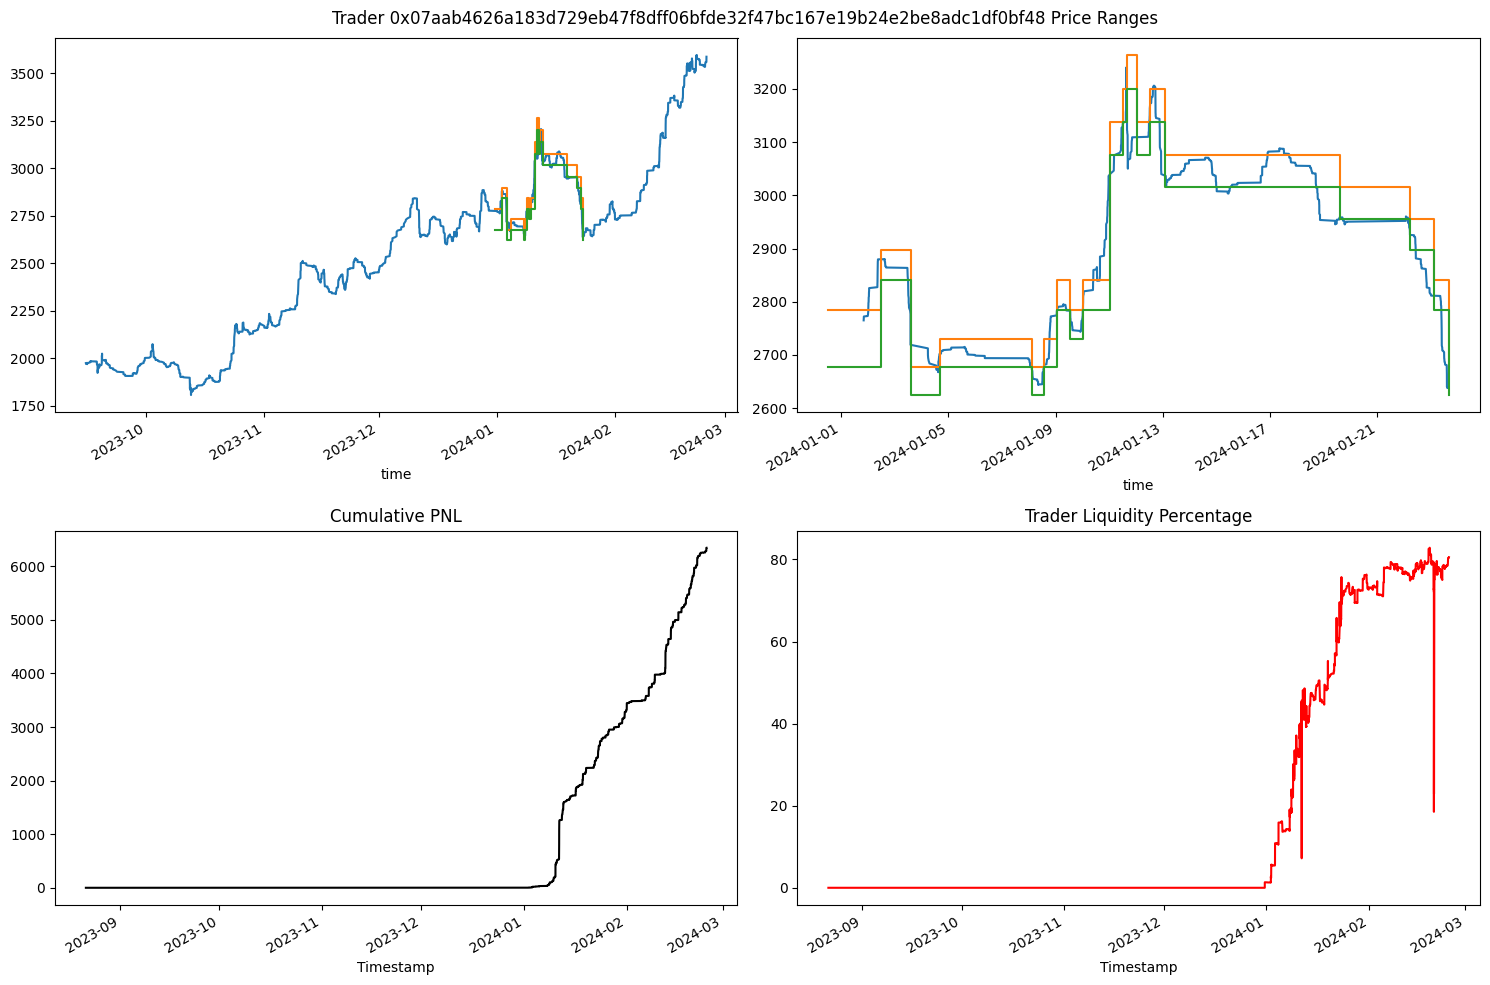

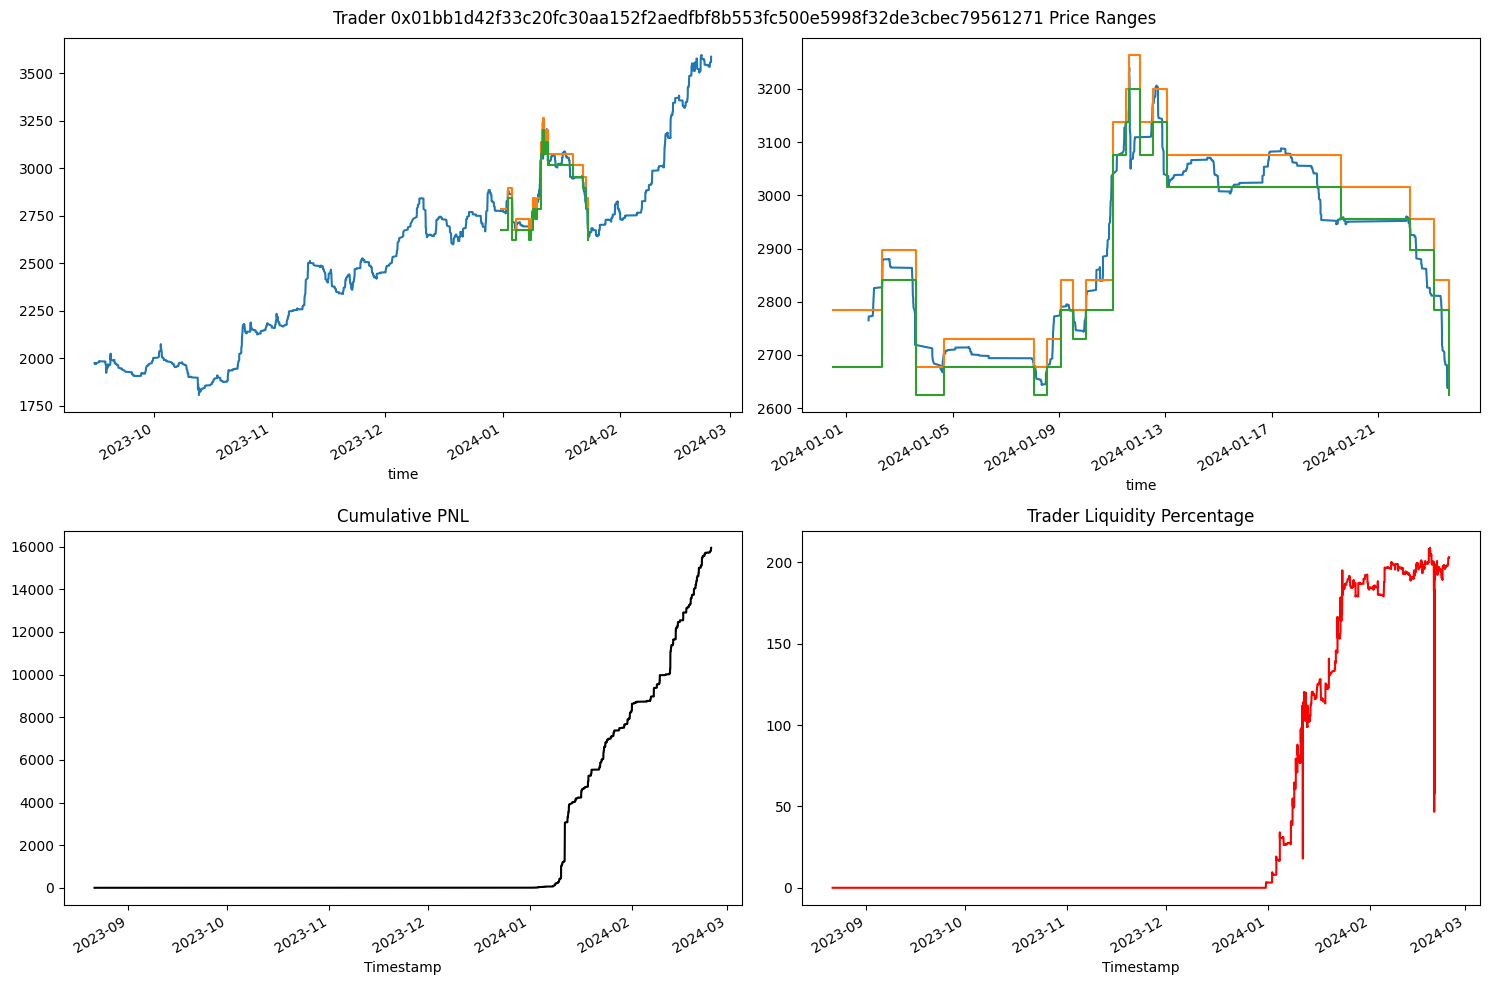

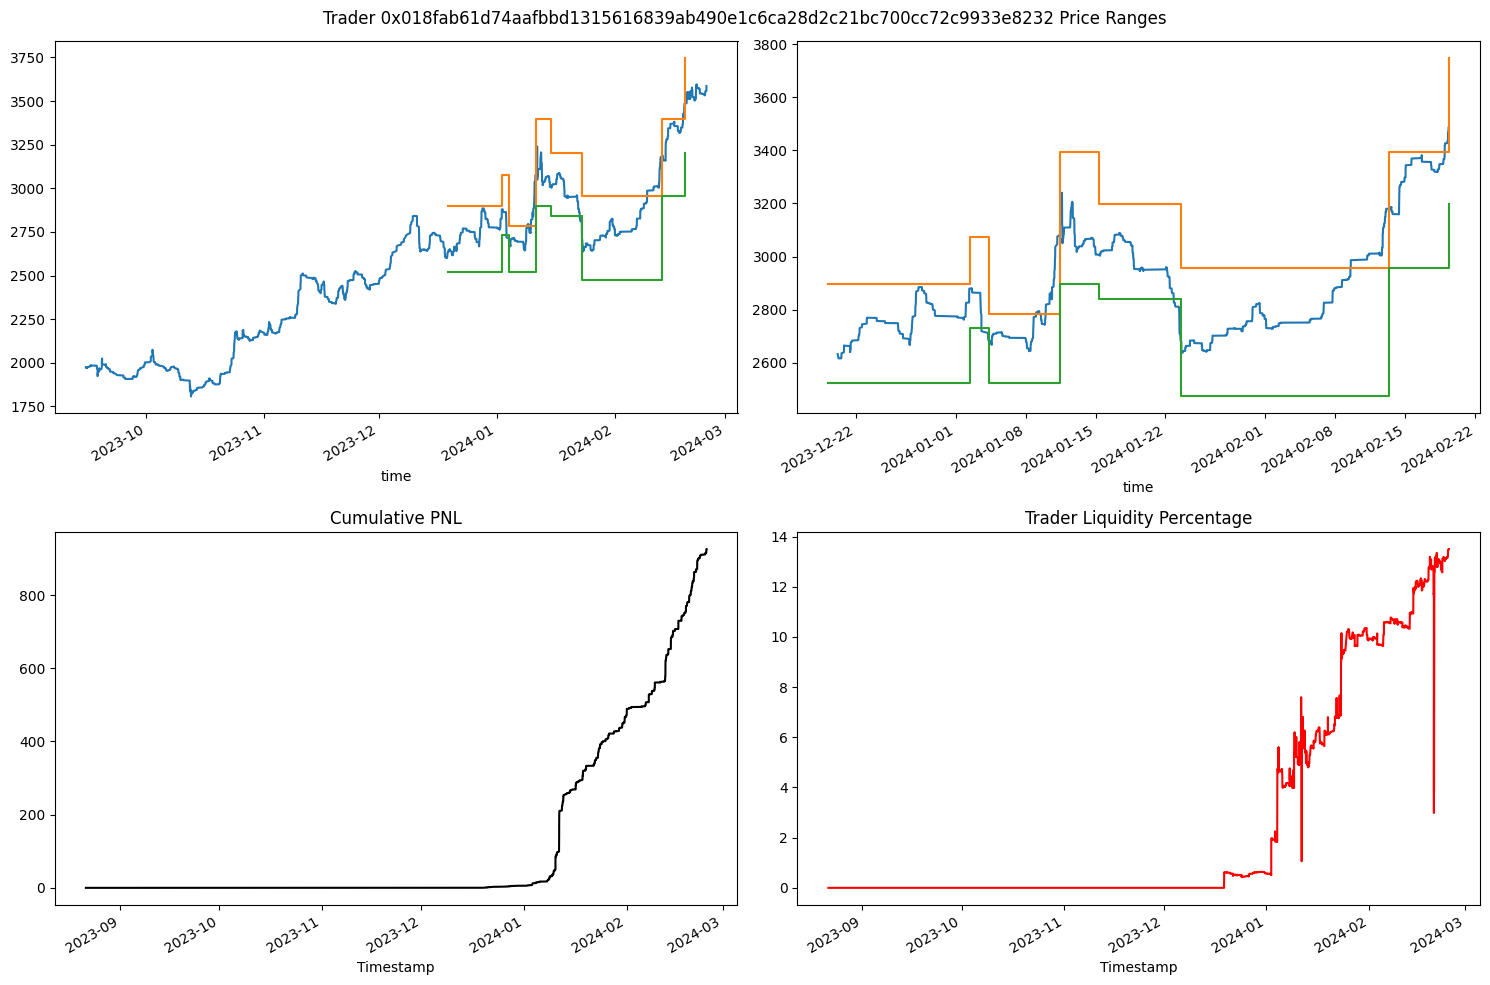

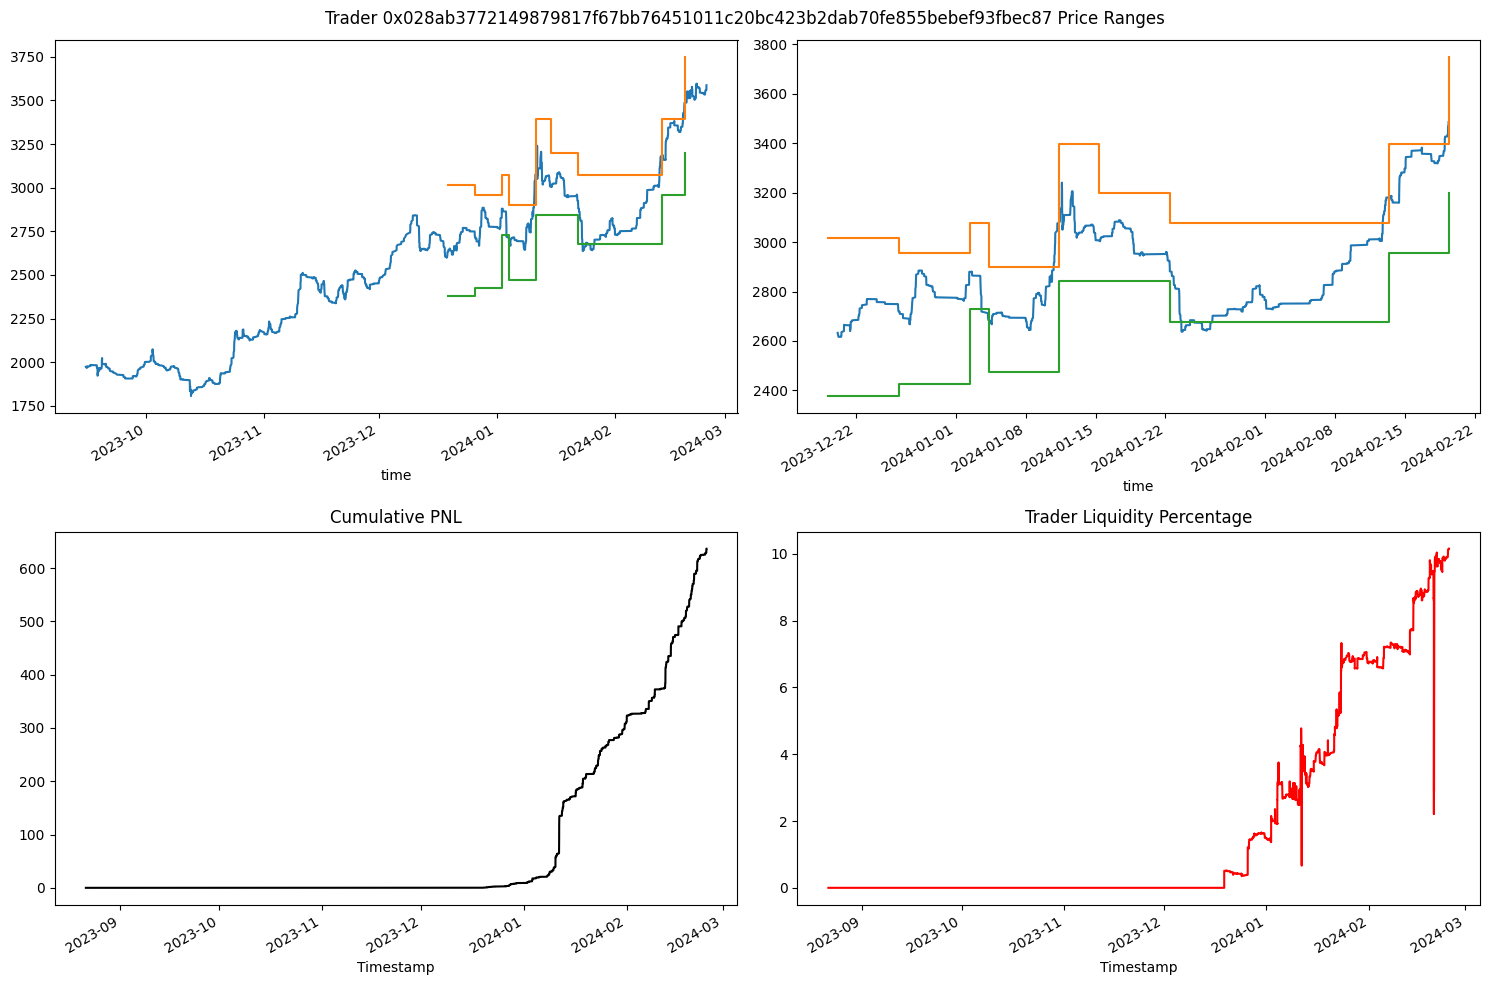

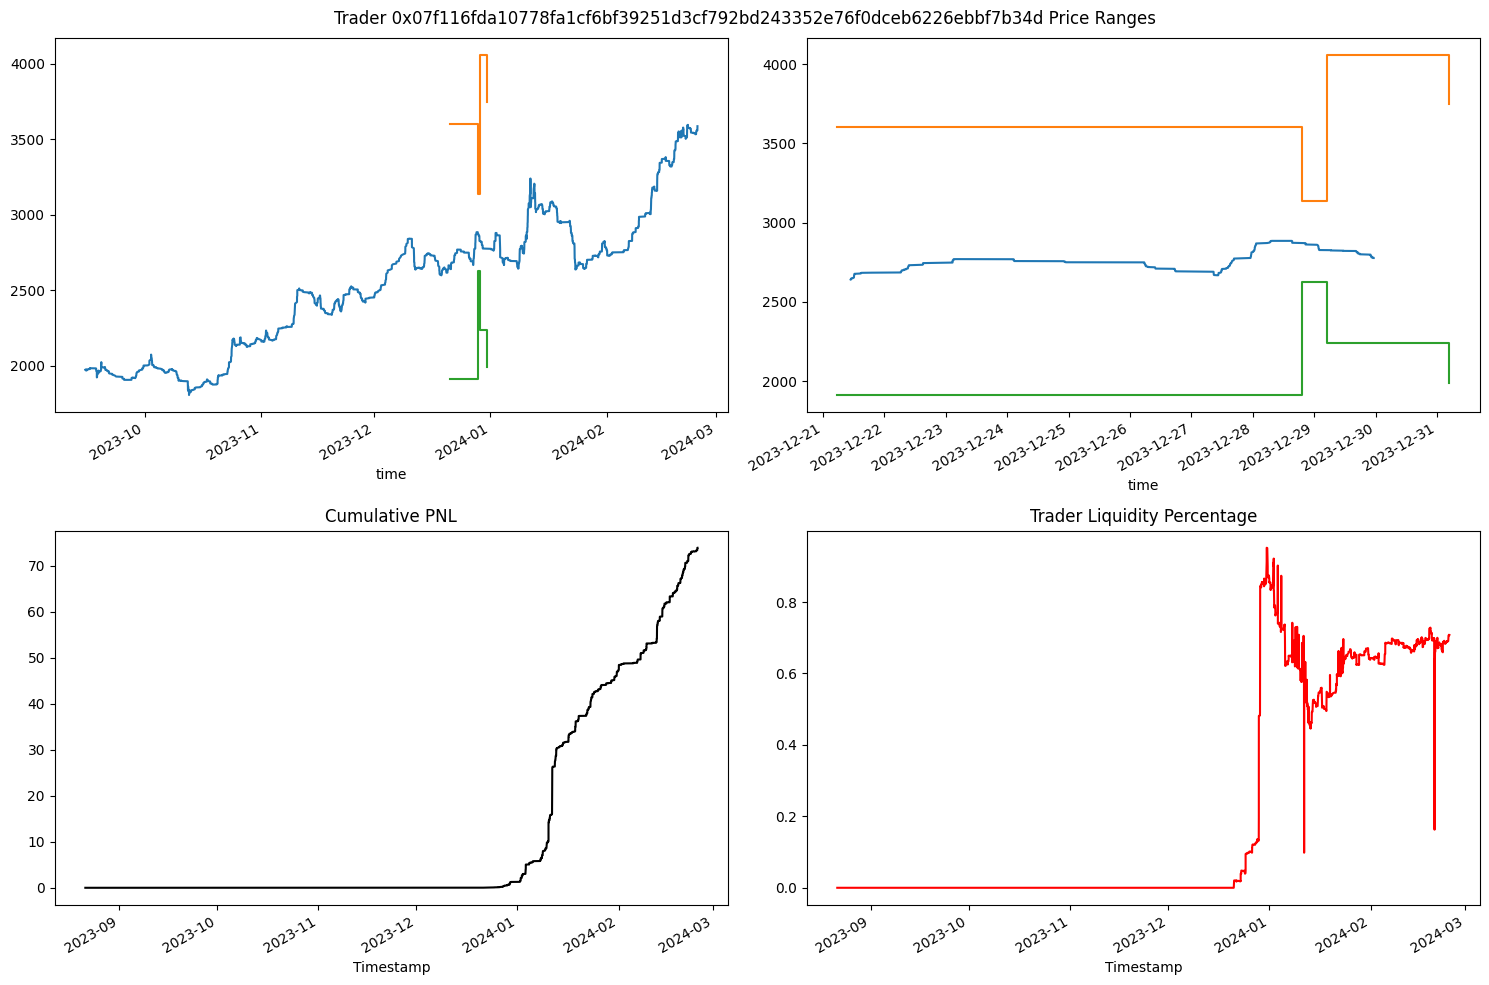

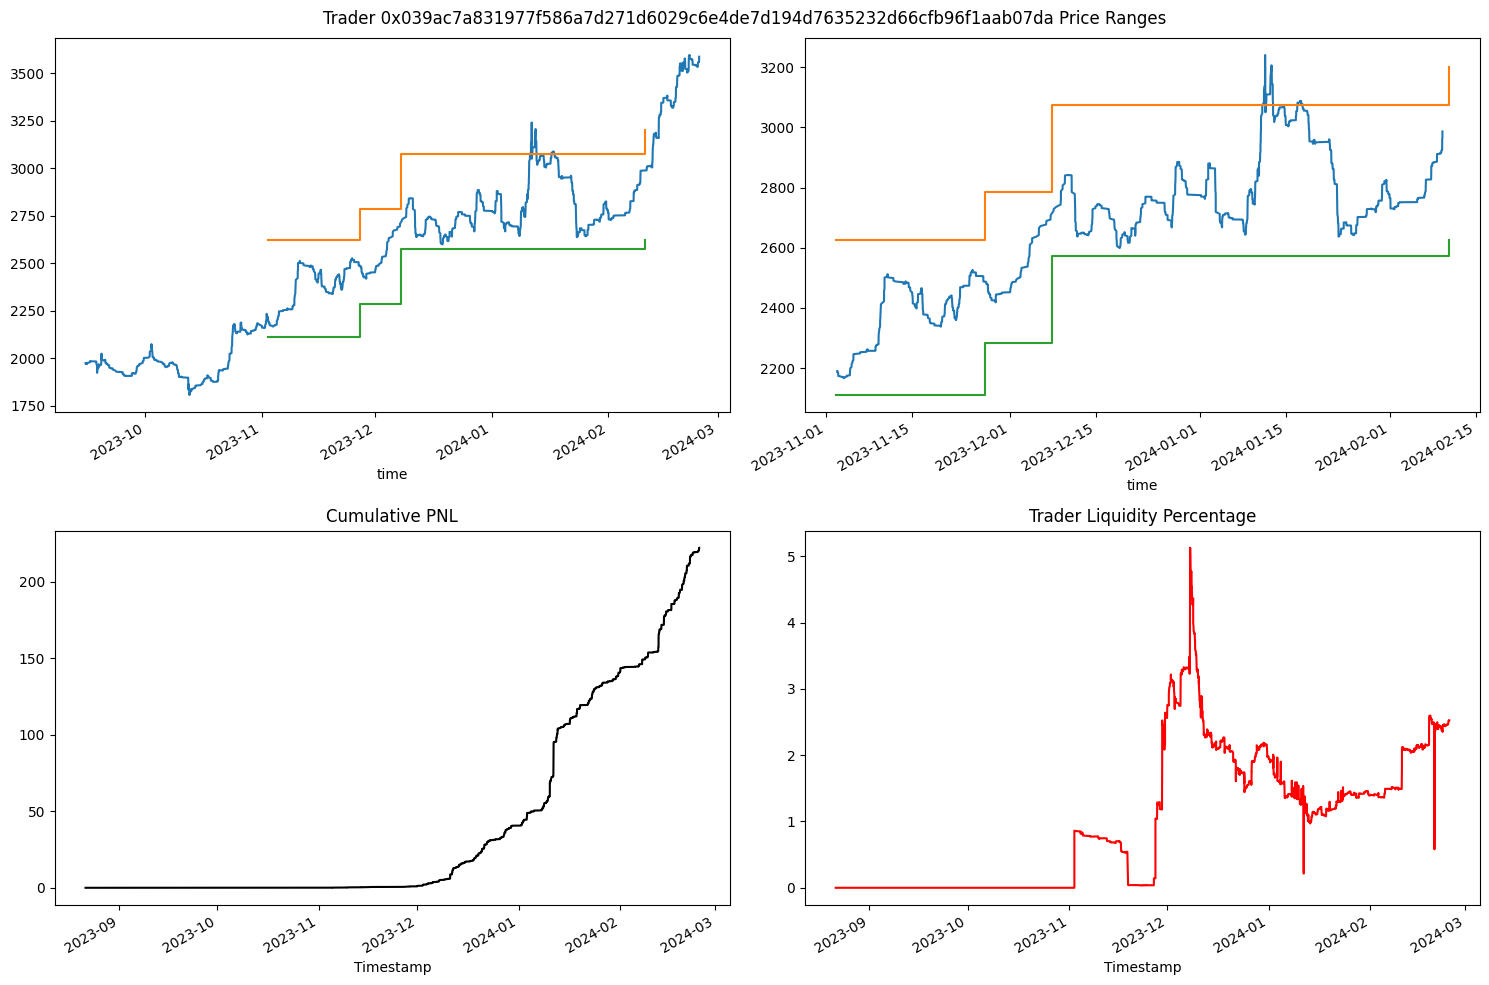

In [87]:
pool_id = df['POOL_ID'].values[0]
pool_data = df[df['POOL_ID'] == pool_id].copy()
pool_data['LIQUIDITY'] = pool_data['LIQUIDITY_AMOUNT'].astype('float').cumsum()

traders_with_enough_events = get_traders_with_enough_events(pool_data)

for trader_id in traders_with_enough_events:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    plot_price_ranges(pool_data, trader_id, ax1, ax2)
    plot_cumulative_pnl_and_liquidity(pool_data, trader_id, ax3, ax4)
    fig.suptitle(f'Trader {trader_id} Price Ranges')
    plt.tight_layout()
    fig.savefig(f'positions_and_metrics/trader_{trader_id}_price_ranges_and_metrics.png')
